In [174]:
import pandas as pd 
import numpy as np
import os
import pathlib 
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [210]:
def parseConfigData(config_string):
    # Define regular expressions for extracting data
    failures_pattern = r"Failures: (\d+\.\d+)%"
    cost_pattern = r"Experiment cost: \$([0-9.]+)"
    cpu_pattern = r"CPU: \[([\d., ]+)\]"
    mem_pattern = r"Mem: \[([\d., ]+)\]"
    func_args_pattern = r"Function argument\(s\): (.+)"

    # Initialize the dictionary to store extracted values
    config_data = {}

    # Extract and store Failures
    failures_match = re.search(failures_pattern, config_string)
    if failures_match:
        config_data["Failures"] = float(failures_match.group(1))

    # Extract and store Experiment cost
    cost_match = re.search(cost_pattern, config_string)
    if cost_match:
        config_data["Experiment Cost"] = float(cost_match.group(1))

    # Extract and store CPU values
    cpu_match = re.search(cpu_pattern, config_string)
    if cpu_match:
        config_data["CPU"] = [float(x.strip()) for x in cpu_match.group(1).split(',')]

    # Extract and store Mem values
    mem_match = re.search(mem_pattern, config_string)
    if mem_match:
        config_data["Mem"] = [float(x.strip()) for x in mem_match.group(1).split(',')]
        
    # Extract and store Function arguments
    func_args_match = re.search(func_args_pattern, config_string)
    if func_args_match:
        config_data["Function Arguments"] = func_args_match.group(1)

    return config_data

In [211]:
def readResult(path, n=9):
    with open(path) as file:
        head = [next(file) for _ in range(n)]
        df = pd.read_csv(file)
        
    res = parseConfigData("\n".join(head))
    res['df'] = df
    best = df.iloc[0]
    res['bestTime'] = best.time
    res['bestCost'] = best.cost
    return res

In [212]:
resultsPath = "../FaaSterConfig/results/"

In [213]:
results = [os.path.basename(x) for x in sorted(pathlib.Path(resultsPath).iterdir(), key=os.path.getmtime)]
for fname in results:
    print(fname)

FaaSterResults_matmul2_20231119-122643.csv
FaaSterResults_matmul2_20231119-124122.csv
FaaSterResults_image-processing_20231119-184711.csv
FaaSterResults_matmul2_20231119-160223.csv
FaaSterResults_matmul2_20231119-192853.csv
FaaSterResults_matmul2_20231119-193345.csv
FaaSterResults_matmul2_20231119-193806.csv
FaaSterResults_matmul2_20231119-194514.csv
FaaSterResults_matmul2_20231119-194945.csv
FaaSterResults_matmul2_20231119-200224.csv
FaaSterResults_image-processing_20231119-200655.csv


In [214]:
mostRecent = results[-1]

In [215]:
mostRecent

'FaaSterResults_image-processing_20231119-200655.csv'

In [216]:
res = readResult(os.path.join(resultsPath,mostRecent))

<re.Match object; span=(265, 411), match='Function argument(s): https://raw.githubuserconte>


In [218]:
res['df']

,CPU,Mem,NodeTypeStr,time,cost,costPerHour,startupTime,timeAndCost
0,0.9,256.0,c7g.large,0.920406,0.000006,0.023159,2.398980,-0.657728
1,0.9,256.0,m5.large,1.031641,0.000008,0.028875,4.924646,-0.600040
2,1.7,256.0,c7g.large,0.981706,0.000011,0.041234,3.548781,-0.544245
3,0.9,256.0,r5.large,1.148126,0.000012,0.036668,3.447331,-0.520255
4,0.9,2304.0,c7g.large,1.054384,0.000013,0.045752,3.542417,-0.494013
5,1.7,2304.0,c7g.large,0.831644,0.000015,0.063827,3.528606,-0.486617
6,0.9,2304.0,r5.large,1.066900,0.000014,0.046512,3.490612,-0.485102
7,0.9,2304.0,m5.large,1.230568,0.000015,0.043875,4.703034,-0.445871
8,1.7,256.0,r5.large,0.951482,0.000018,0.068168,3.445454,-0.409529
9,1.7,2304.0,r5.large,0.959317,0.000021,0.078012,2.392085,-0.352596


In [149]:
# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

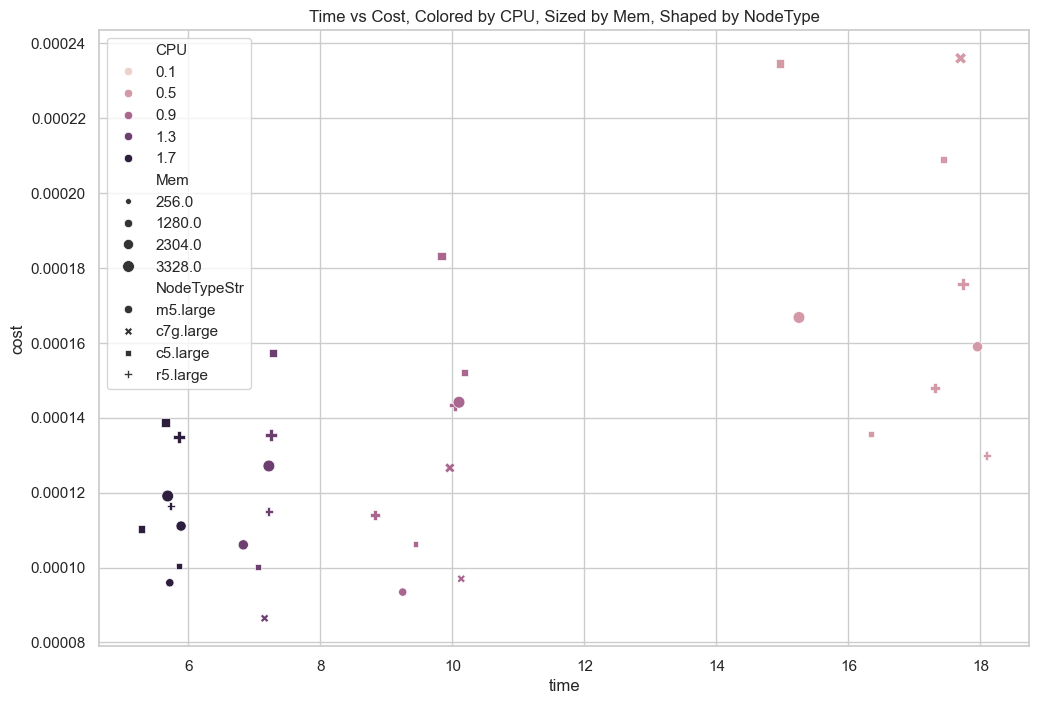

In [150]:
# Plot 1: time vs cost, colored by CPU, size of Mem, and shape of NodeType
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x="time", y="cost", hue="CPU", size="Mem", style="NodeTypeStr", data=df)
scatter.set_title("Time vs Cost, Colored by CPU, Sized by Mem, Shaped by NodeType")
plt.show()

<Figure size 1200x800 with 0 Axes>

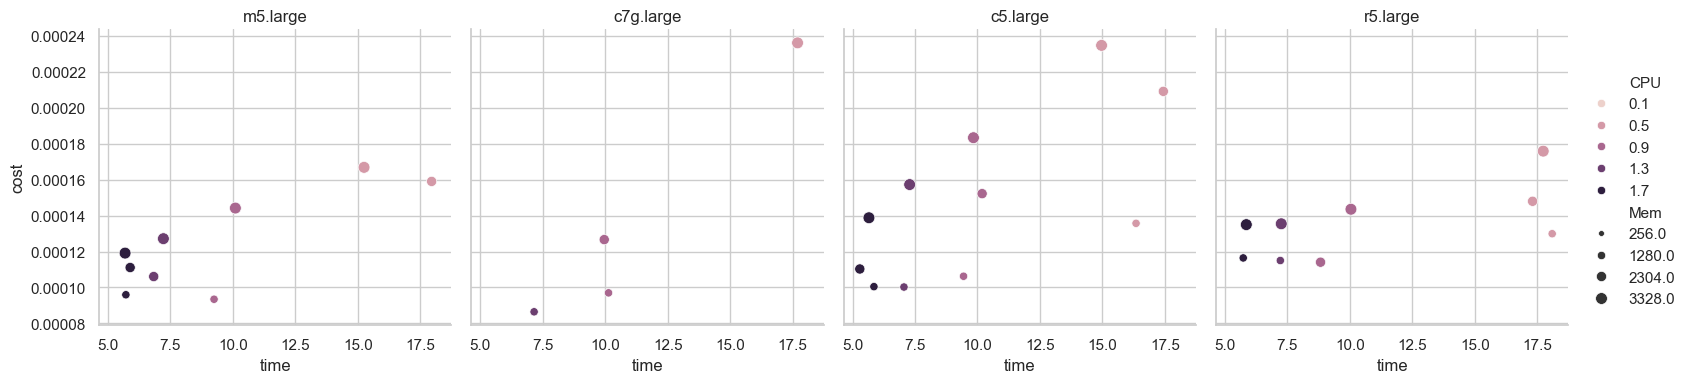

In [151]:
# Plot 2: time vs cost, 1 grid per NodeType
plt.figure(figsize=(12, 8))
scatter_by_node_type = sns.FacetGrid(df, col="NodeTypeStr", col_wrap=4, height=4)
scatter_by_node_type.map(sns.scatterplot, "time", "cost", hue="CPU", size="Mem", data=df)
scatter_by_node_type.set_titles("{col_name}")
scatter_by_node_type.add_legend()
plt.show()

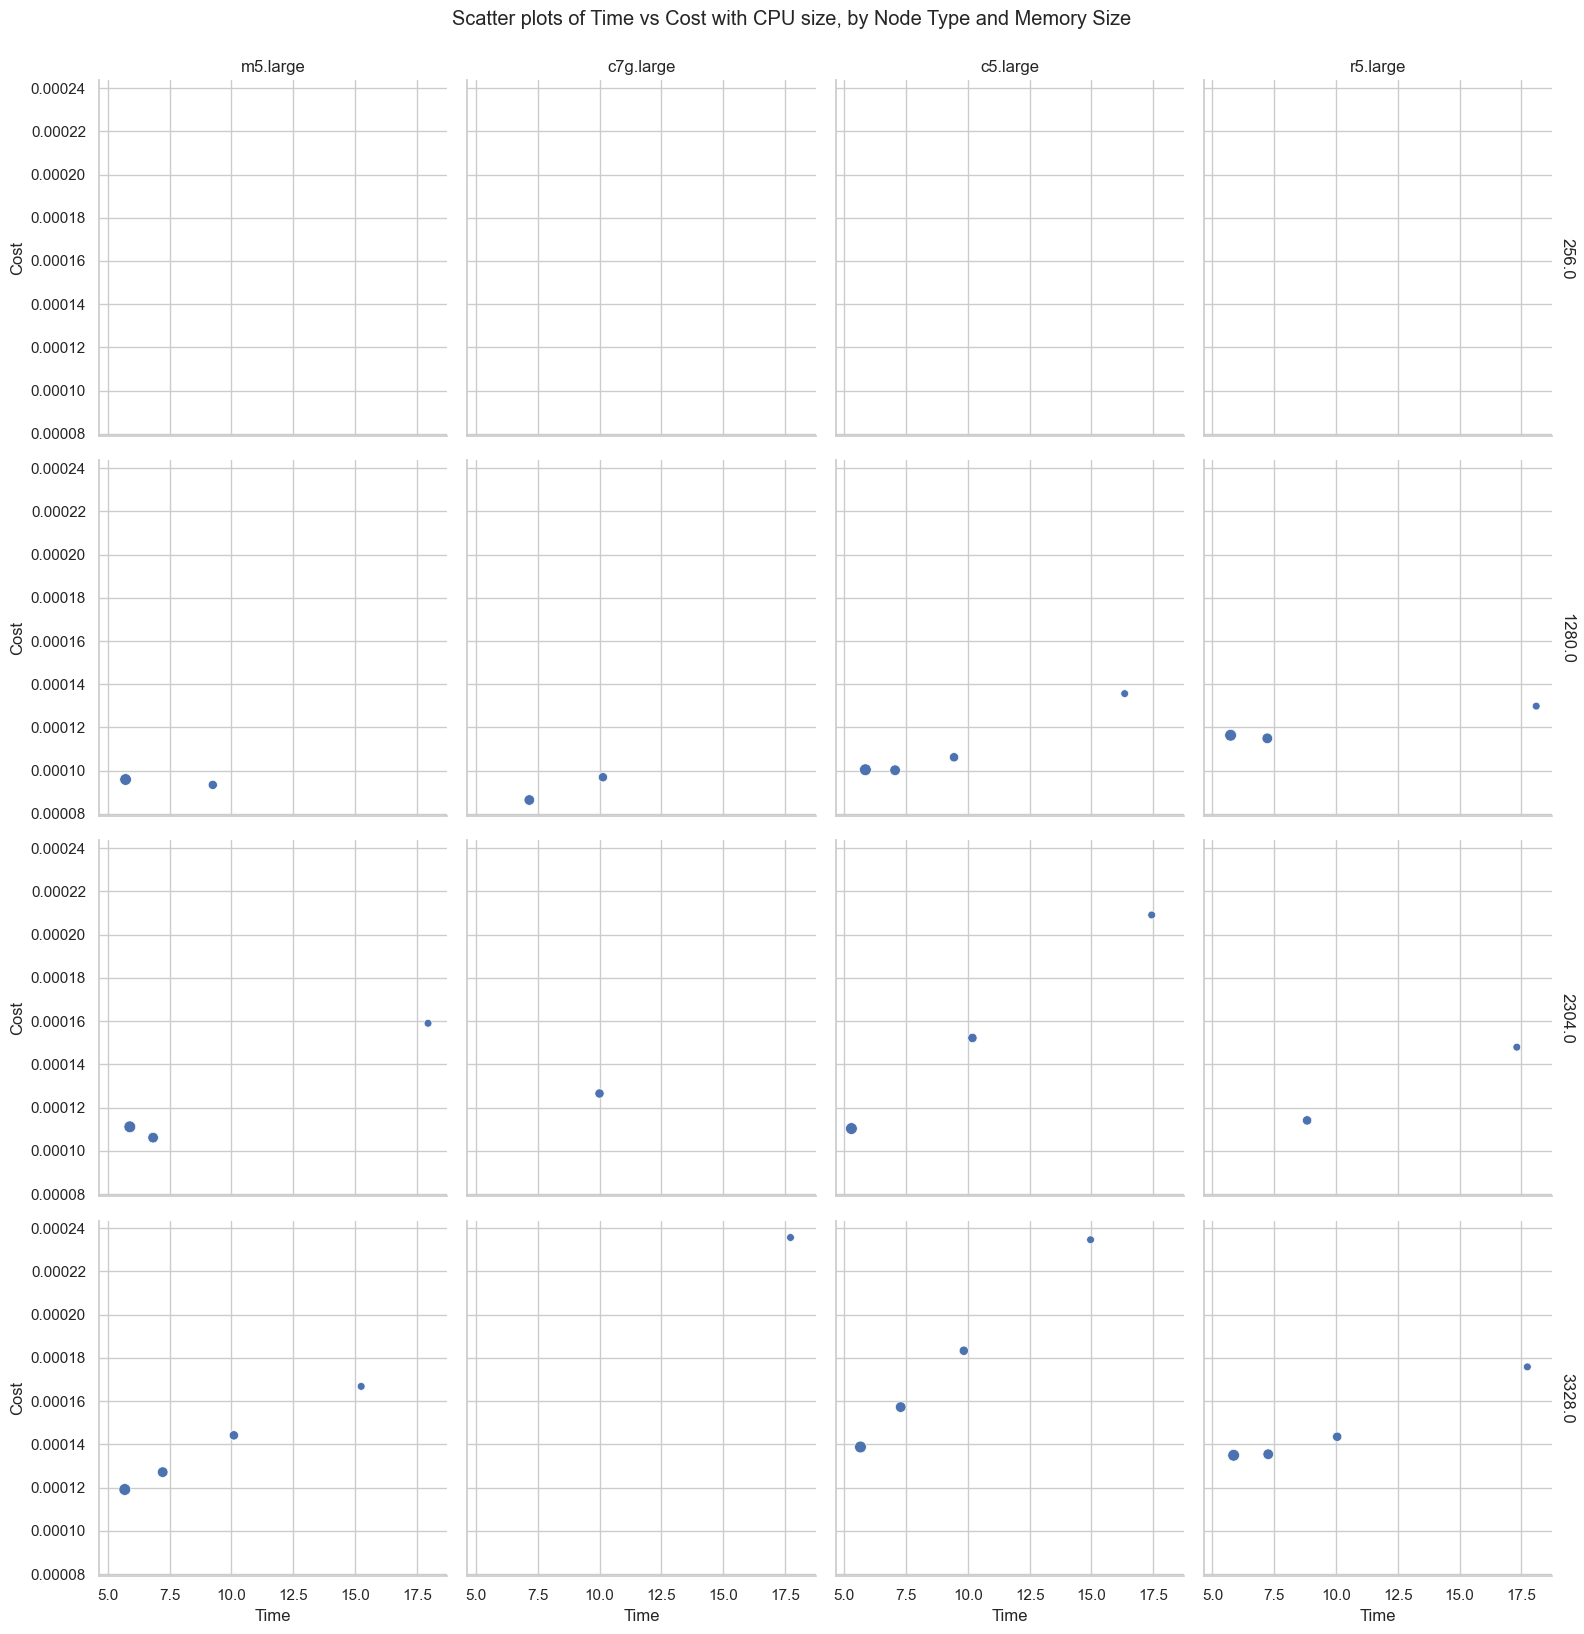

In [152]:
# Create a FacetGrid with node type on the x-axis and memory size on the y-axis
g = sns.FacetGrid(df, col="NodeTypeStr", row="Mem", margin_titles=True, height=4)

# Map scatter plots to each subplot
g.map(sns.scatterplot, "time", "cost", size="CPU", data=df)

# Adjust layout and add titles
g.set_axis_labels("Time", "Cost")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.fig.suptitle("Scatter plots of Time vs Cost with CPU size, by Node Type and Memory Size", y=1.02)

# Show the plot
plt.show()

In [122]:
def getRanges(start, end, num=10):
    step = (end-start)/num
    return np.arange(start, end, step)

def subSample(arr, rate=1):
    return arr[0::rate]

def npstr(arr):
    return ' '.join([f"{v:.5}" for v in arr])

In [123]:
allCpu = np.arange(.1,2,.1)
allMem = np.arange(.25,4,.25)*1024
allCpu,allMem, len(allCpu), len(allMem)

(array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
        1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
 array([ 256.,  512.,  768., 1024., 1280., 1536., 1792., 2048., 2304.,
        2560., 2816., 3072., 3328., 3584., 3840.]),
 19,
 15)

In [136]:
cpu = subSample(allCpu, 8)
cpu

array([0.1, 0.9, 1.7])

In [94]:
mem = getRanges(2**8, 2**10, 5)
mem

array([256. , 409.6, 563.2, 716.8, 870.4])

In [137]:
def getCommand(cpu, mem):
    return f"-c {npstr(cpu)} -m {npstr(mem)}"

In [140]:
def getCommands():
    for s in [1,2,4,8]:
        cpu = subSample(allCpu, s)
        mem = subSample(allMem, s)
        print(len(cpu),len(mem))
        yield getCommand(cpu,mem)

In [141]:
list(getCommands())

19 15
10 8
5 4
3 2


['-c 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 -m 256.0 512.0 768.0 1024.0 1280.0 1536.0 1792.0 2048.0 2304.0 2560.0 2816.0 3072.0 3328.0 3584.0 3840.0',
 '-c 0.1 0.3 0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9 -m 256.0 768.0 1280.0 1792.0 2304.0 2816.0 3328.0 3840.0',
 '-c 0.1 0.5 0.9 1.3 1.7 -m 256.0 1280.0 2304.0 3328.0',
 '-c 0.1 0.9 1.7 -m 256.0 2304.0']